## (existing) Analysis of AI4boundaries (https://essd.copernicus.org/articles/15/317/2023/) dataset

Dataset images distribution:

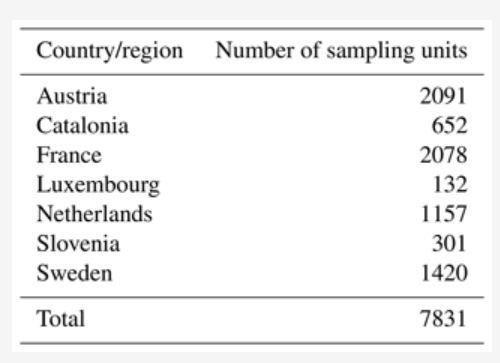

The original dataset contains 14.8 M parcels covering 376 K km2. The stratified sampling resulting in 7831 of 4 km samples contains 2.5 M parcels covering 47 105 km2. The mean area refers to parcel area in hectares, while the total mean area is here in the table the average area for the seven regions:

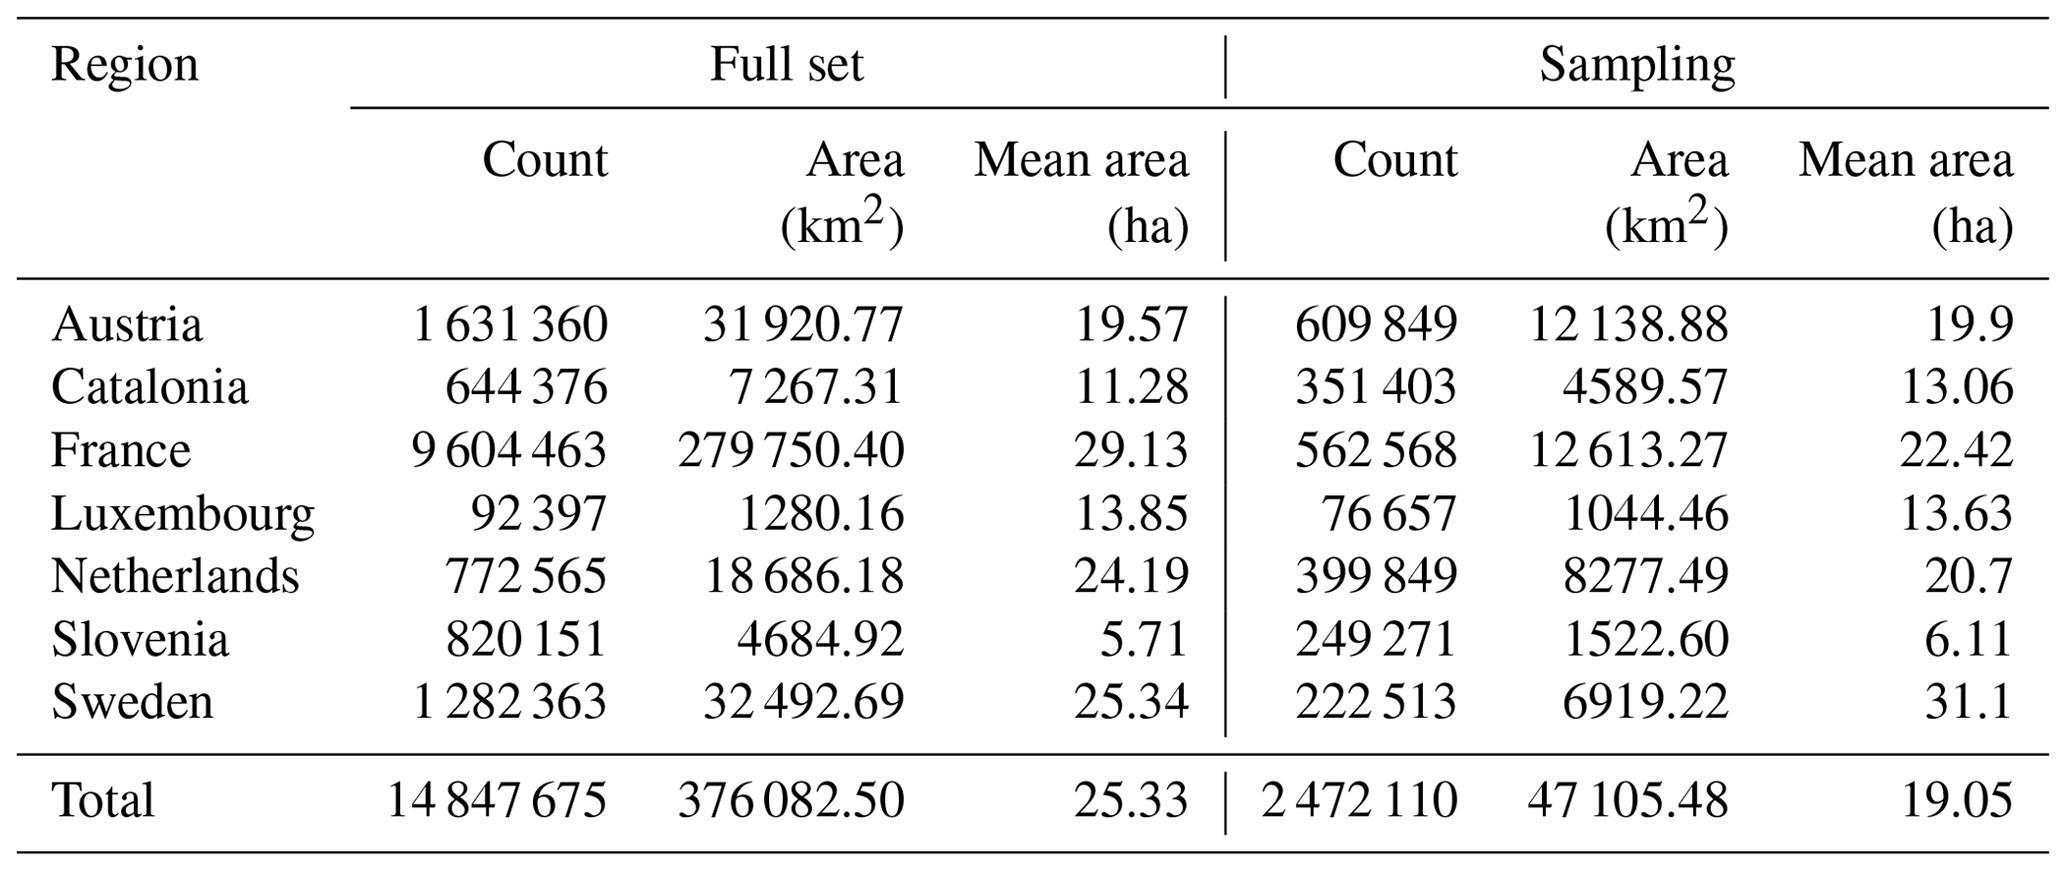

In the regions covered by the dataset, the average size of the parcel is 25.33 ha, ranging from 5.71 ha in Slovenia to 29.13 ha in France.

Distribution of sampling units among the seven regions with the two variables:

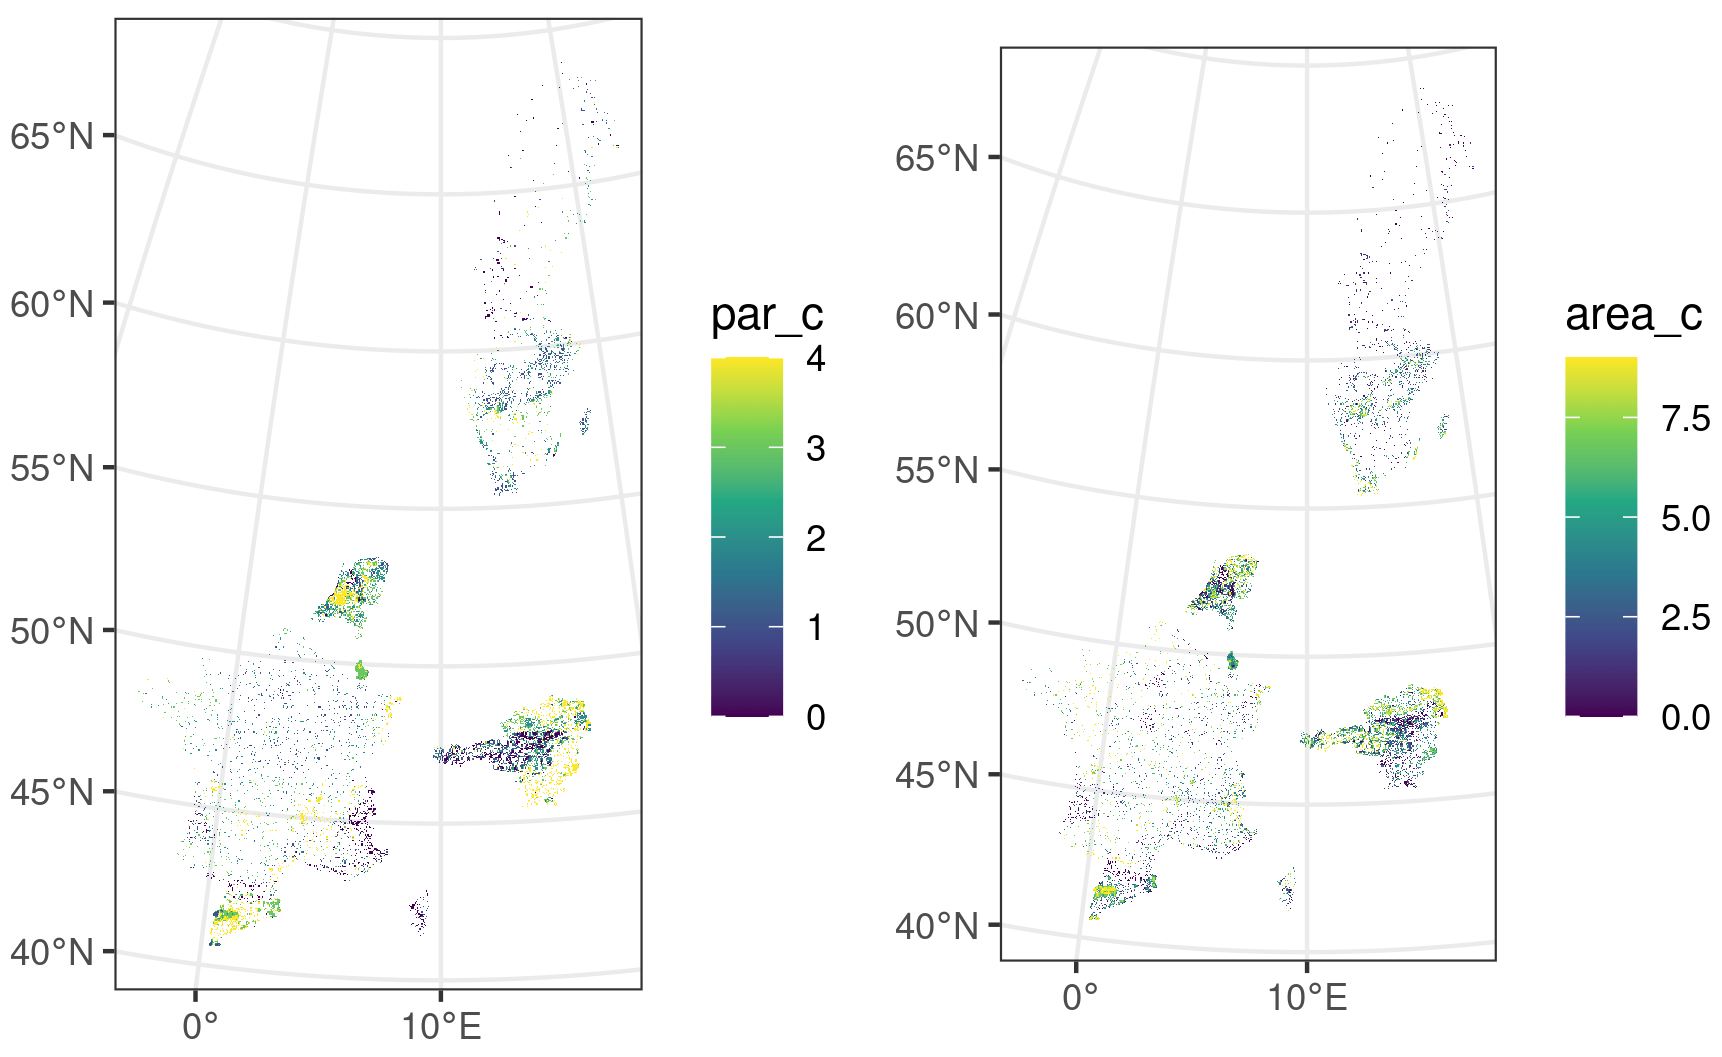

#### Lables

The labels are obtained from vector parcels of the GSAA for each specific region. The GSAA refers to the annual crop declarations made by EU farmers for CAP area-aid support measures. The electronic GSAA records include a spatial delineation of the parcels. A GSAA element is always a polygon of an agricultural parcel with one crop (or a single crop group with the same payment eligibility). The GSAA is operated at the region or country level in the EU-28, resulting in about 65 different designs and implementation schemes over the EU. Since these infrastructures are set up in each region, at the moment, data are not interoperable, nor are legends semantically harmonised. Furthermore, most GSAA data are not publicly available, although several countries are increasingly opening the data for public use. In this study, seven regions with publicly available GSAA are selected, representing a contrasting gradient across the EU

### AI4boundaries data (images, labels) quality existing research

1. https://medium.com/sentinel-hub/utility-of-ai4boundaries-and-eurocrops-as-training-datasets-for-field-delineation-ff514471d067 .
For each sample we scored the quality of the polygon labels according to their fullness (i.e. whether the polygons cover all the visible agricultural parcels) and correctness (i.e. whether the contours of the polygon match what is seen on the image) from 1–5, where 1 represents terrible (<20% are correct) and 5 represents great (>95% are correct).     __Spain, Luxembourg, Netherlands, and Slovenia__ exhibited higher scores. On the other hand, __Austria and France__ showed poor performance, primarily due to a low percentage of agricultural parcels corresponding to fields fullness.     When examining the best-performing countries on a monthly basis, the distribution of scores remains relatively consistent throughout the year, although certain months exhibit a lower prevalence of high scores. These months include January, May, September, October, November, and December. This means that the __boundaries are less, if at all, visible on some months__.                         Generally, patches with a low number of fields tend to have lower scores, regardless of field size. To prepare the dataset for training, we implemented specific rules. Firstly, we calculated the area and count of polygons, and then applied a filtering __criterion of count > 50 and area > 0.1__. This filtering step allowed us to effectively distinguish the majority of low scores (1) from the remaining data. Notably, this differentiation was particularly evident in __France__, where a limited presence of polygons was observed, leading us to exclude samples from France entirely.

Additionally, we removed samples that received a score below 3, indicating a mediocre performance with approximately 60% correct polygons. In addition, to better mitigate the effect of missing polygons, we trained our model __masking out parts__ of the image where there are no GSAA polygons.

2. https://github.com/fkroeber/ai4b/tree/main . During the exploratory data analyses, some flaws in the AI4Boundaries data set were noticed. The most serious ones – introducing many false-positives to the data sets – concern…

- mislabelling of non-agricultural areas as agricultural parcels (frequently occuring for scenes in the Alpine region)

- fragmentations of parcels, i.e. extreme oversegmentations into sets of pixelwise segment

- cloud artifacts the for the imagery can be related to the described pixelwise temporal interpolation technique (only a small number of all tiles are severely affected by this less than 1 %).

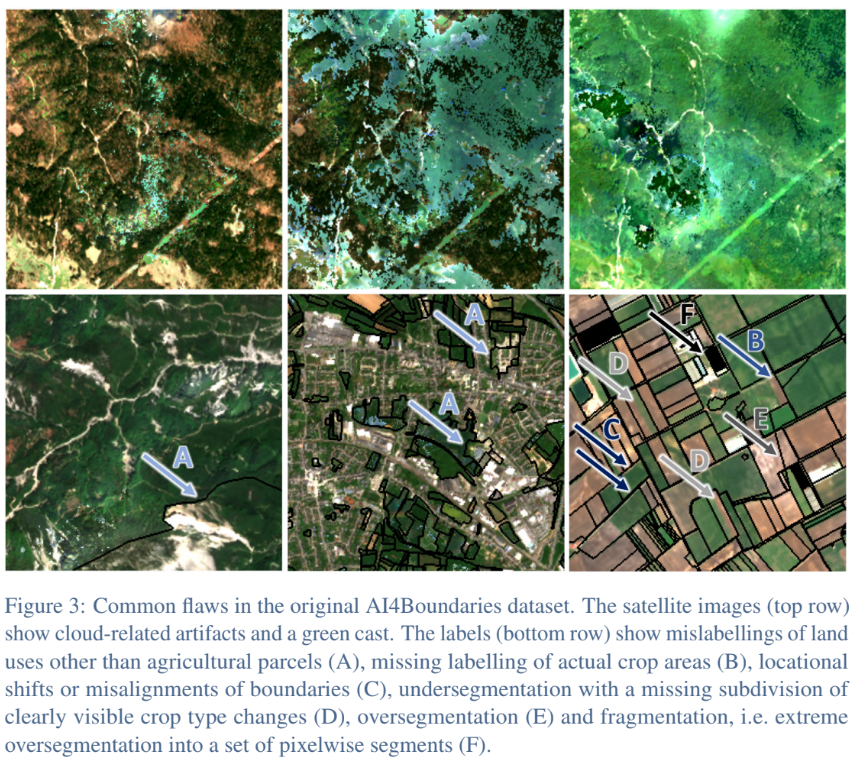

Accordingly, extendend pre-processing based on CORINE Land Cover (CLC) products as auxiliary data and geometric/shape-related filter criteria was applied to derive an enhanced version of the AI4Boundaries data set. This filtered dataset contains 4955 tiles à 256×256 pixels, which is about 2/3 of the original size of AI4Boundaries. Shape: Firstly, the __minimum area__ of a segment is larger than 25 pixels, which corresponds to an area of __0.25 ha__. Secondly, the minor axis length of an ellipse whose normalized second central moments corresponds to the moments of the segment is larger than 1. Thirdly, the segment’s solidity defined as the ratio of its area to the area of its convex hull is larger than 0.4. Fourthly, the segment’s Euler Number defined by the number of objects minus the number of holes is less than or equal to 5. In the third stage, informative samples were selected by excluding all tiles for which the share of agricultural land as defined by the __labels is less than 10 %__. Also, tiles with a total of less than __5 parcels were excluded__. a final preprocessing step, the range of the R, G, B, NIR bands of all images was normalised to the interval [0,1].

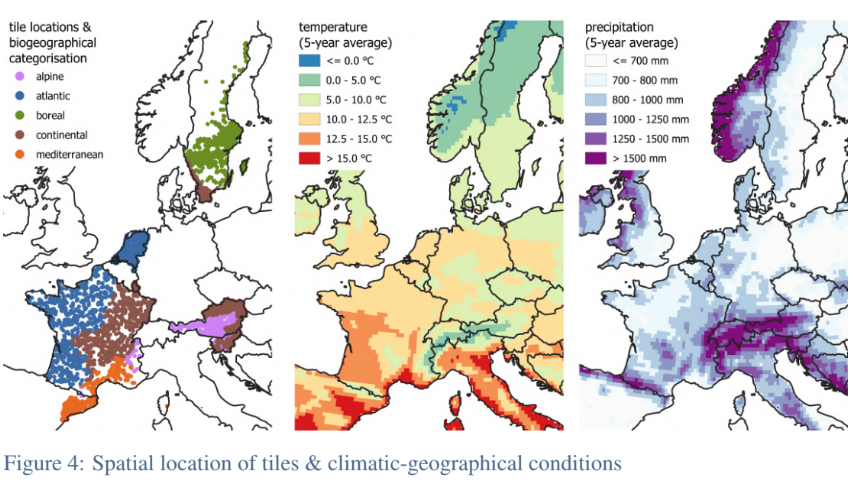

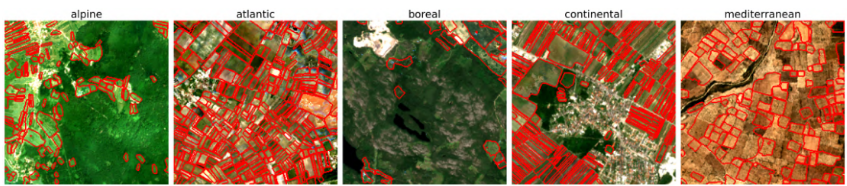

### Limitation of Sentinel-2 for field boundaries delineation (https://essd.copernicus.org/articles/15/317/2023/)

__Sentinel-2 has also inherent limitations for small parcels__ monitoring as it was already highlighted (Vajsová et al., 2020). They show that about 10 % out of 867 fields less than 0.5 ha in size were not monitorable with Sentinel-2.

The labels are obtained from __GSAA containing inherent caveats__. First of all, the geometry accuracy is referred to as , i.e. better than 1 m. Sometimes, parcels do not correspond to the agricultural field. Limitations of the labelled dataset could be the geometries, the timeliness, and also the semantics. As agricultural fields might be missing (e.g. due to not being present in original GSAA data), the data sets are really only suitable for the masked approach in training – the models trained on AI4Boundaries should only learn about the borders, extent, and distance of the included fields.

## Stats computation & analysis of AI4boundaries dataset

For each country (__ai4boundaries_dataset_eda_$country.ipynd__):

1. Download image mask.
2. compute patch stats.
3. compute general stats.
4. download images+masks for problematic patches (e. g. no fields, small number of fields, small percentage of fields, complex fields, ...).
5. visualize random problematic patches.
6. final analysis for country.

Comparison analysis between countries. Localization. Number of parcels, area covered with fields, parcels sizes, parcels geometry, ...
Final analysis.

## Combine stats of countries into one dataset

In [58]:
import os
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

In [3]:
SENTINEL2_DIR = "C:\\Users\\alena.bakhoryna\\Documents\\code\\ai4boundaries_dataset" # your path here
data_split_path = os.path.join(SENTINEL2_DIR, "ai4boundaries_ftp_urls_sentinel2_split.csv") # your path here
final_stats_path = os.path.join("../../../data/", "ai4boundaries_ftp_urls_sentinel2_split_stats_v1.csv")

In [7]:
data_list = []
for country in ['NL', 'AT', 'SE', 'LU', 'ES', 'SI', 'FR']:
    path = os.path.join(SENTINEL2_DIR, "stats", f"{country}_stats.csv")
    data_list.append(pd.read_csv(path))
data_stats = pd.concat(data_list)
data = pd.read_csv(data_split_path)
data = data.merge(data_stats, left_on='file_id', right_on='file_id')
data.to_csv(final_stats_path, index=False)

## Comparison analysis between countries

In [4]:
data = pd.read_csv(final_stats_path)

In [5]:
data.columns

Index(['file_id', 'split', 'sentinel2_masks_file_url',
       'sentinel2_images_file_url', 'Country', 'new_split', 'lat', 'lon',
       'n_fields', 'prc_fields', 'sm_area_cnt', 'bg_area_cnt',
       'sm_solidity_cnt', 'bg_solidity_cnt', 'sm_eccentricity_cnt', 'area_min',
       'perimeter_min', 'solidity_min', 'eccentricity_min', 'extent_min',
       'orientation_min', 'area_mean', 'perimeter_mean', 'solidity_mean',
       'eccentricity_mean', 'extent_mean', 'orientation_mean', 'area_max',
       'perimeter_max', 'solidity_max', 'eccentricity_max', 'extent_max',
       'orientation_max', 'no_field', 'sm_prc_fields', 'sm_num_fields',
       'n_fields_gt', 'n_fields_ls', 'prc_fields_gt', 'prc_fields_ls',
       'sm_area_cnt_gt', 'sm_area_cnt_ls', 'bg_area_cnt_gt', 'bg_area_cnt_ls',
       'sm_solidity_cnt_gt', 'sm_solidity_cnt_ls', 'bg_solidity_cnt_gt',
       'bg_solidity_cnt_ls', 'sm_eccentricity_cnt_gt',
       'sm_eccentricity_cnt_ls'],
      dtype='object')

In [31]:
col_desc = [
       ['n_fields', 'prc_fields', 'area_mean'], 
    ['sm_area_cnt', 'bg_area_cnt',
       'sm_solidity_cnt', 'bg_solidity_cnt', 'sm_eccentricity_cnt'], 
     ['no_field', 'sm_prc_fields', 'sm_num_fields'],
       # ['n_fields_gt', 'n_fields_ls', 'prc_fields_gt', 'prc_fields_ls',
       # 'sm_area_cnt_gt', 'bg_area_cnt_gt',
       # 'sm_solidity_cnt_gt', 'bg_solidity_cnt_gt']
]
for col in col_desc:
    display(data.groupby('Country')[col].describe())

n_fields                                                             \
           count        mean         std   min    25%    50%    75%     max   
Country                                                                       
AT        2091.0  124.922525  157.159754   0.0    8.0   60.0  198.0  1521.0   
ES         652.0  228.044479  158.955189   0.0   98.0  226.5  336.5   790.0   
FR        2078.0  115.001925  134.163142   0.0   11.0   67.0  172.0   963.0   
LU         132.0  221.507576   83.064630  15.0  172.0  226.0  273.0   419.0   
NL        1157.0  147.764909  108.601769   0.0   58.0  134.0  219.0   682.0   
SE        1420.0   69.382394   60.009075   0.0   18.0   58.0  105.0   308.0   
SI         301.0  349.621262  286.707277   0.0   58.0  365.0  530.0  1416.0   

        prc_fields                                                          \
             count       mean        std  min     25%    50%     75%   max   
Country                                                                      
AT          2091.0  36.265710  26.614141  0.0  13.800  31.10  57.900  99.2   
ES           652.0  44.623620  28.567694  0.0  18.900  48.65  69.000  95.4   
FR          2078.0  37.572185  27.366464  0.0  12.825  34.60  61.500  99.7   
LU           132.0  49.925000  19.228217  2.1  35.350  51.45  64.750  87.4   
NL          1157.0  44.638375  28.387909  0.0  17.300  47.90  70.000  94.5   
SE          1420.0  31.048310  25.130446  0.0   8.500  26.50  49.625  97.9   
SI           301.0  31.695349  22.975279  0.0   9.700  29.90  50.900  79.7   

        area_mean                                                   \
            count         mean          std        min         25%   
Country                                                              
AT         2011.0  1595.400793  4370.447396   1.000000  134.884834   
ES          605.0   152.006139   131.897727  18.500000   90.617391   
FR         1977.0   982.153551  2857.567824   1.500000  149.416667   
LU          132.0   149.835410    38.093459  54.810277  126.404371   
NL         1094.0   277.309905   858.449734   3.000000  136.290724   
SE         1299.0   569.896475  1557.804637   3.000000  184.769830   
SI          287.0   102.155248   150.044067  17.054286   46.351262   

                                               
                50%         75%           max  
Country                                        
AT       219.187500  887.217949  65018.000000  
ES       125.247934  168.137931   1508.025641  
FR       254.316384  457.259259  56664.000000  
LU       144.841915  167.224814    322.730769  
NL       192.246212  266.911791  18874.000000  
SE       287.517241  430.568750  24358.000000  
SI        65.145270   89.447439   1797.000000

sm_area_cnt                                                          \
              count        mean         std  min   25%    50%    75%    max   
Country                                                                       
AT           2091.0   30.813008   51.335476  0.0   1.0   12.0   41.0  829.0   
ES            652.0   75.360429   75.098055  0.0  21.0   58.0  102.5  521.0   
FR           2078.0   25.382579   41.761784  0.0   1.0   11.0   33.0  654.0   
LU            132.0   54.583333   24.409997  2.0  36.0   53.5   69.0  141.0   
NL           1157.0   23.475367   25.832046  0.0   8.0   19.0   31.0  346.0   
SE           1420.0    8.448592    8.710004  0.0   2.0    6.0   12.0   64.0   
SI            301.0  156.833887  156.730572  0.0  25.0  129.0  224.0  973.0   

        bg_area_cnt                                                \
              count      mean       std  min  25%  50%  75%   max   
Country                                                             
AT           2091.0  0.710187  1.187328  0.0  0.0  0.0  1.0   8.0   
ES            652.0  0.397239  1.131938  0.0  0.0  0.0  0.0   9.0   
FR           2078.0  0.647257  1.237443  0.0  0.0  0.0  1.0  10.0   
LU            132.0  0.045455  0.242872  0.0  0.0  0.0  0.0   2.0   
NL           1157.0  0.165946  0.653801  0.0  0.0  0.0  0.0   9.0   
SE           1420.0  0.643662  1.242225  0.0  0.0  0.0  1.0   9.0   
SI            301.0  0.166113  0.576467  0.0  0.0  0.0  0.0   4.0   

        sm_solidity_cnt                                                  \
                  count      mean       std  min  25%  50%   75%    max   
Country                                                                   
AT               2091.0  0.469632  1.854107  0.0  0.0  0.0  0.00   28.0   
ES                652.0  0.305215  0.803470  0.0  0.0  0.0  0.00    9.0   
FR               2078.0  1.593359  4.756638  0.0  0.0  0.0  1.75   79.0   
LU                132.0  0.234848  0.522178  0.0  0.0  0.0  0.00    3.0   
NL               1157.0  1.707001  6.722996  0.0  0.0  0.0  2.00  154.0   
SE               1420.0  0.028873  0.175722  0.0  0.0  0.0  0.00    2.0   
SI                301.0  0.737542  1.351870  0.0  0.0  0.0  1.00    7.0   

        bg_solidity_cnt                                                     \
                  count        mean         std  min    25%    50%     75%   
Country                                                                      
AT               2091.0   59.426112   71.691515  0.0   3.00   24.0  107.50   
ES                652.0  118.039877   88.627103  0.0  43.75  107.0  181.25   
FR               2078.0   61.879692   72.760653  0.0   5.00   35.0   95.00   
LU                132.0  111.757576   43.434275  9.0  79.75  113.5  140.75   
NL               1157.0   94.576491   67.202918  0.0  35.00   92.0  144.00   
SE               1420.0   37.626761   35.614154  0.0   8.00   30.0   56.00   
SI                301.0  139.382060  110.954601  0.0  22.00  138.0  226.00   

               sm_eccentricity_cnt                                            \
           max               count      mean        std  min  25%  50%   75%   
Country                                                                        
AT       368.0              2091.0  1.296987   2.057612  0.0  0.0  0.0   2.0   
ES       392.0               652.0  8.161043  12.481266  0.0  1.0  3.0   9.0   
FR       488.0              2078.0  1.429740   2.875296  0.0  0.0  0.0   2.0   
LU       253.0               132.0  9.303030   4.950040  0.0  6.0  9.0  12.0   
NL       353.0              1157.0  1.454624   2.211731  0.0  0.0  1.0   2.0   
SE       182.0              1420.0  0.339437   0.662278  0.0  0.0  0.0   1.0   
SI       432.0               301.0  8.667774   8.543765  0.0  2.0  7.0  13.0   

               
          max  
Country        
AT       20.0  
ES       84.0  
FR       68.0  
LU       27.0  
NL       30.0  
SE        4.0  
SI       51.0

no_field                     sm_prc_fields                      \
           count unique    top  freq         count unique    top  freq   
Country                                                                  
AT          2091      2  False  2011          2091      2  False  1767   
ES           652      2  False   605           652      2  False   579   
FR          2078      2  False  1977          2078      2  False  1727   
LU           132      1  False   132           132      2  False   129   
NL          1157      2  False  1094          1157      2  False  1014   
SE          1420      2  False  1299          1420      2  False  1155   
SI           301      2  False   287           301      2  False   238   

        sm_num_fields                      
                count unique    top  freq  
Country                                    
AT               2091      2  False  1271  
ES                652      2  False   598  
FR               2078      2  False  1334  
LU                132      2  False   129  
NL               1157      2  False   988  
SE               1420      2  False  1020  
SI                301      2  False   247

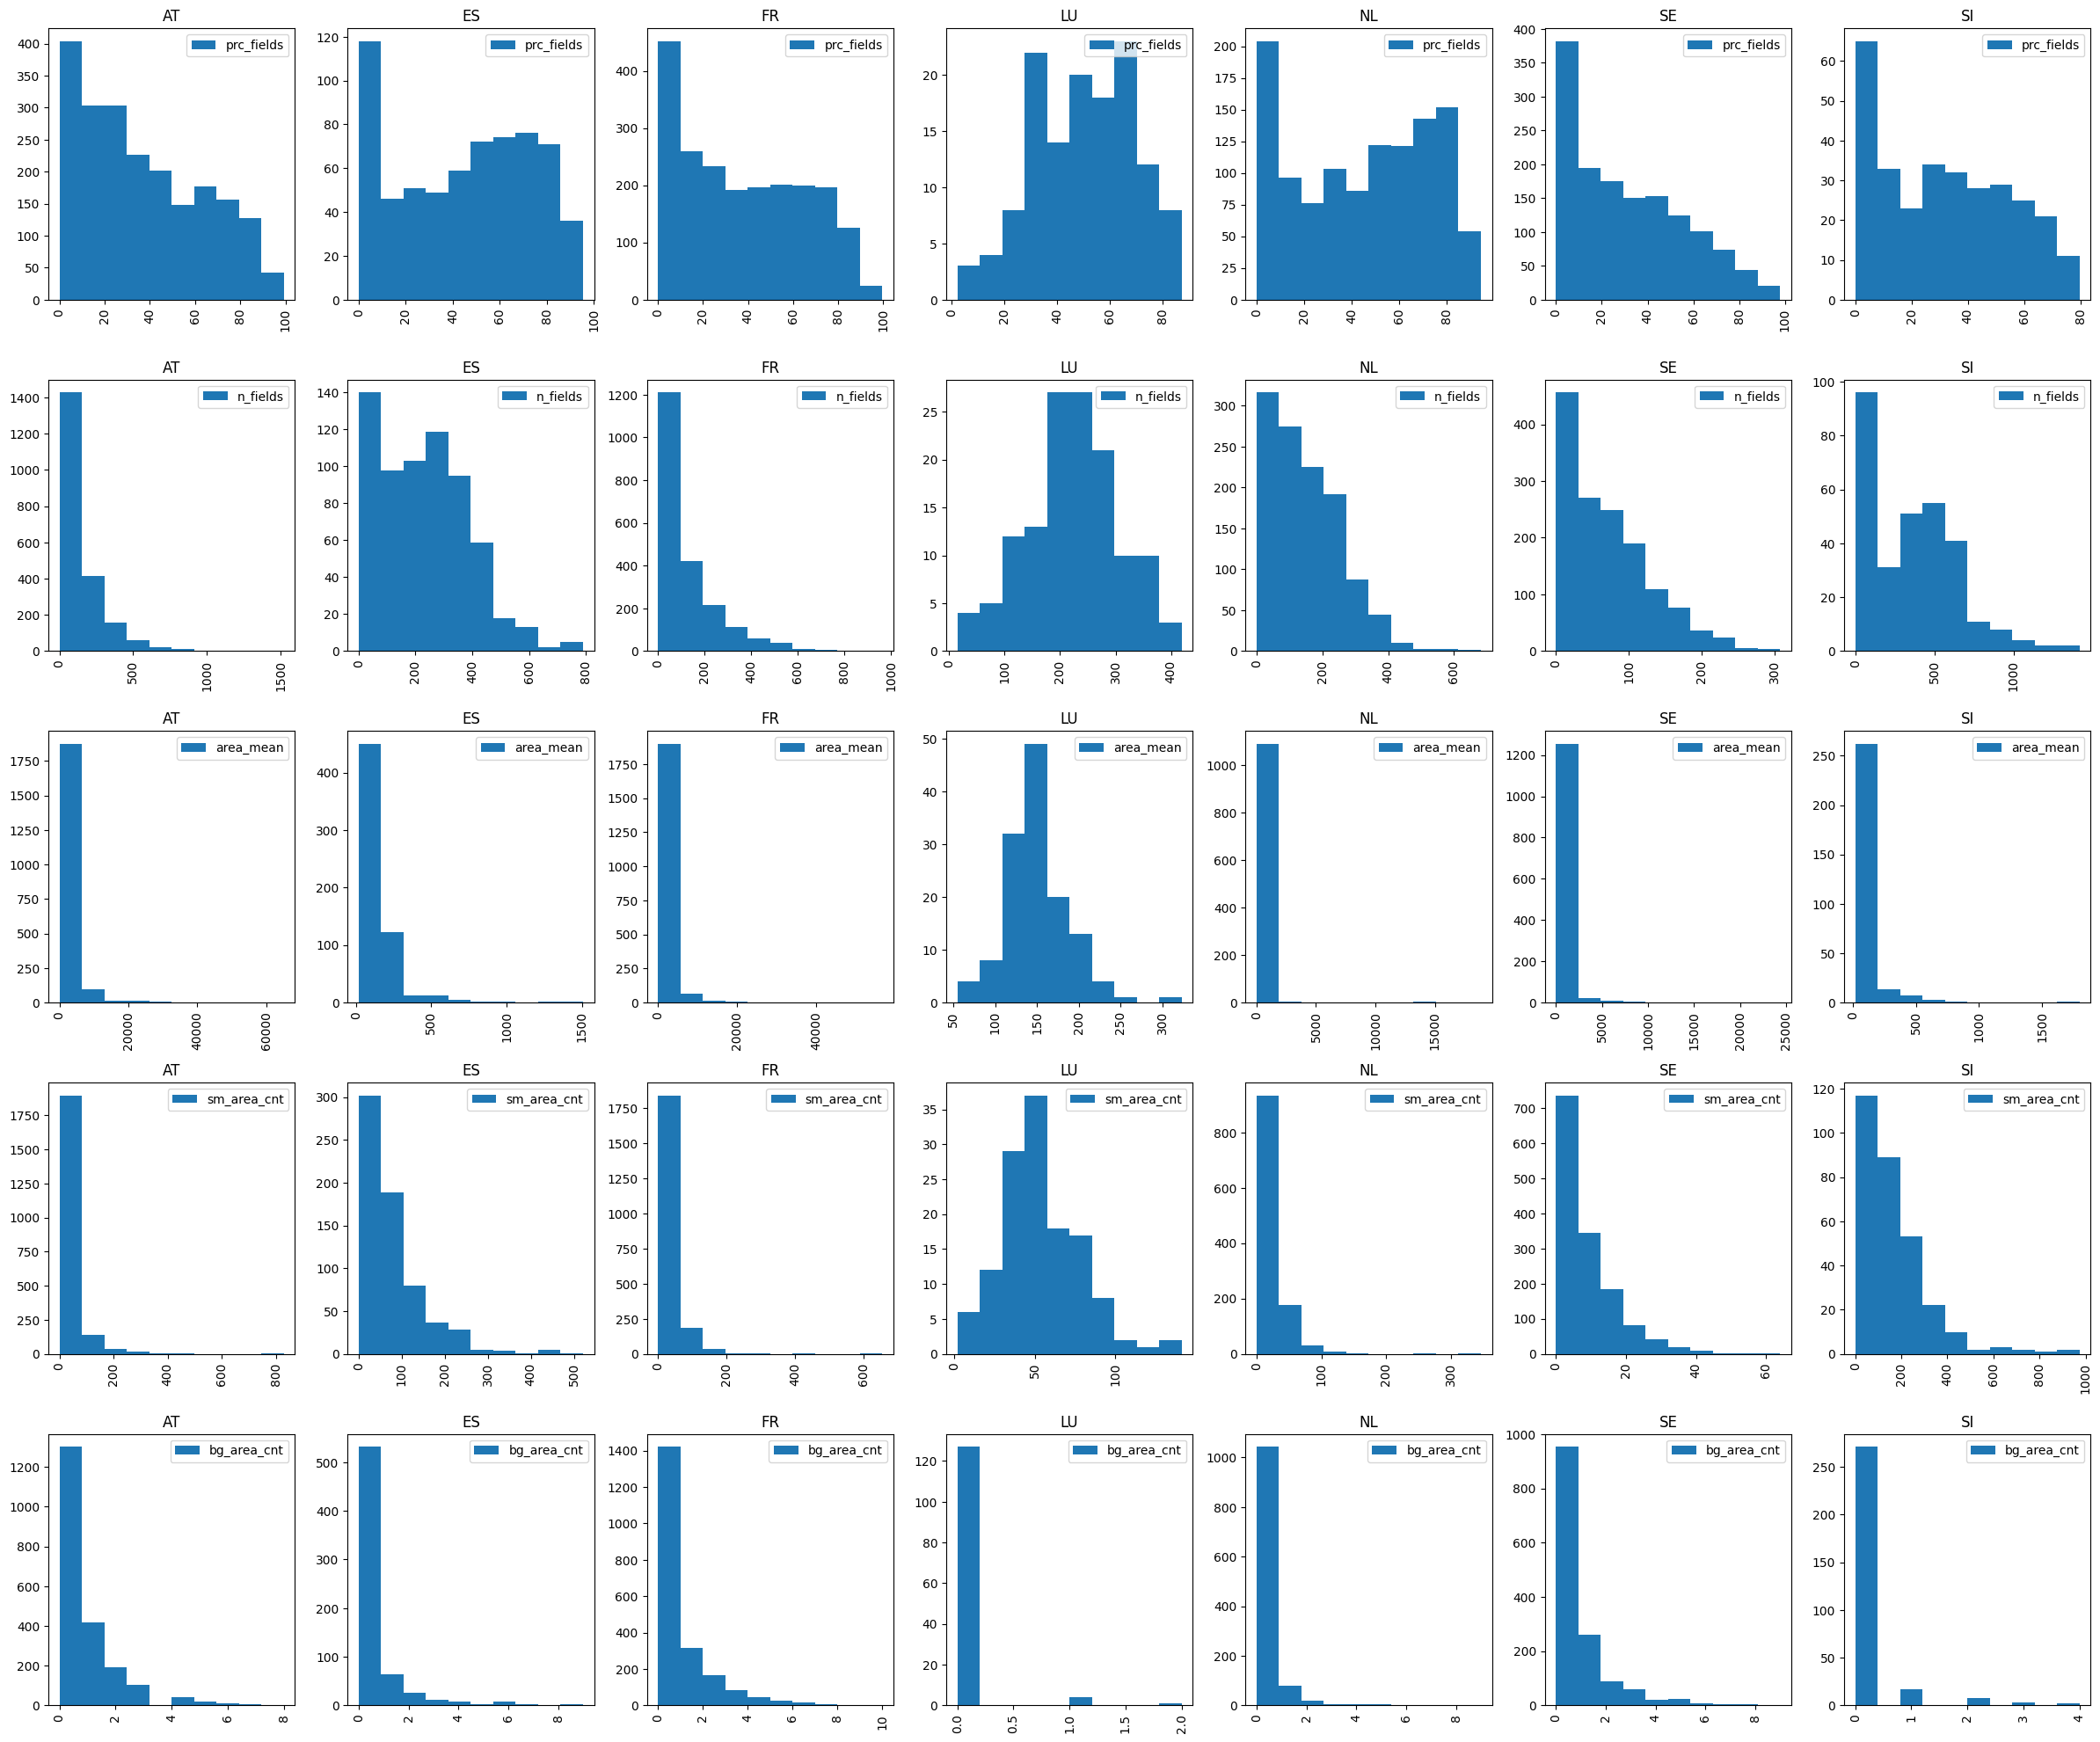

In [42]:
cols_hist = ['prc_fields', 'n_fields', 'area_mean', 'sm_area_cnt','bg_area_cnt',
       #'sm_solidity_cnt', 'bg_solidity_cnt',
            ]
fig, ax = plt.subplots(ncols=len(data['Country'].unique()), nrows=len(cols_hist), figsize=(24, 20))
for idx, col in enumerate(cols_hist): 
    # Distribution of col in the image by country
    _ = data.hist([col], bins=10, legend=True, by='Country', ax=ax[idx])
plt.tight_layout()

In [65]:
vals_df = {}
for col in ['no_field', 'sm_prc_fields', 'sm_num_fields']:
    vals = data[data[col]].groupby(['Country'])['file_id'].count()
    total_val = data.groupby(['Country'])['file_id'].count()
    vals_df[col] = np.round(vals / total_val / 0.01)
vals_df = pd.DataFrame(vals_df)
vals_df = vals_df.fillna(0)
vals_df

no_field  sm_prc_fields  sm_num_fields
Country                                        
AT            4.0           15.0           39.0
ES            7.0           11.0            8.0
FR            5.0           17.0           36.0
LU            0.0            2.0            2.0
NL            5.0           12.0           15.0
SE            9.0           19.0           28.0
SI            5.0           21.0           18.0

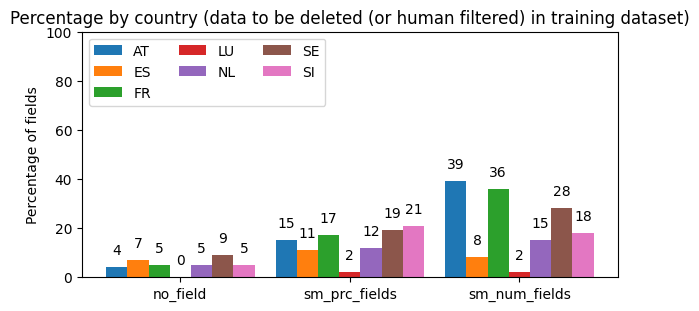

In [96]:
species = ['no_field', 'sm_prc_fields', 'sm_num_fields']

x = np.arange(len(species))  # the label locations
width = 1/(len(vals_df) + 1)  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(6, 3))

for index, row in vals_df.iterrows():
    offset = width * multiplier
    rects = ax.bar(x + offset, row, width, label=index)
    ax.bar_label(rects, padding=len(vals_df))
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of fields')
ax.set_title('Percentage by country (data to be deleted (or human filtered) in training dataset)')
ax.set_xticks(x + width * (len(vals_df) // 2), species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

## Analysis

1. Number of fields in the image on average. Range from minimum Sweden (SE) 69 fields to maximum in Slovenia (SI) - 349 (Sweden->France->Austria->Netherlands->Luxembourg->Catalonia->Slovenia). Min number of fields in the image is 0 for all countries except Luxembourg with min = 15 fields. Max number of fields in the image is from Sweden (308) to Austria (1521) - (Sweden->Luxembourg->Netherlands->Catalonia->France->Slovenia->Austria).
2. France, Autria, Catalonia, Sweden, Netherlands has patches with varies number (1-10) of big fields (area > 25ha). On other hand, there are patches with small fields (area < 0.25ha) with ranging number of small crop fields in the image (100-1000 small parcels in the image) (Slowenia -> Austria -> Catalonia -> France -> Netherlands).
3. Data to be deleted from the dataset. The most persentage of data to remove from Austria & France & Sweden & Slovenia (~40%). After deleting the class of images without fields in the scene and with small percentage (or number of parcels) wouldn't be presented in the training data (skrewed data distribution). 


## Future Analysis

For every country choose representative images with small, big, meduim (complexity of the parcel geometry, season of S2 aquisition) fields. Visualize the model prediction on this parcels -> current model problems. 
Example (small parcels):

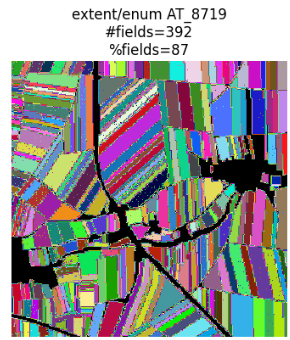